# **USE CASE DESCRIPTION**

Lithologi adalah gambaran umum tentang sifat fisik batuan di suatu daerah tertentu. Sifat-sifat ini biasanya mencakup komposisi batuan, ukuran butir, warna, atau teksturnya. Dalam dunia pengeboran sumur (well logging), lithologi merujuk pada ringkasan sifat fisik utama batuan. Jenis batuan yang paling sering ditemui biasanya adalah batu pasir (sandstone), batu tulis (slate), basal, atau batu kapur (limestone)

Memahami lithologi di dalam sumur sangat penting dalam proses pengeboran. Cara paling sederhana untuk mengetahui jenis lithologi adalah dengan menganalisis sampel batuan dari formasi tersebut. Namun, mengambil sampel ini tidak selalu mudah dan kadang-kadang tidak memungkinkan. Oleh karena itu, para ahli mengembangkan teknik lain untuk memprediksi jenis lithologi. Di kompetisi ini, kami mengusulkan untuk menggunakan data log sumur (well log data) untuk menebak jenis lithologi. Jadi, dengan data yang ada, kita mencoba menentukan batuan apa yang ada di dalam sumur tanpa harus mengambil sampel langsung.

In [1]:
import pandas as pd

# **LOAD DATASET**

In [8]:
dataset_df = pd.read_csv("./Train dataset/combined_train_dataset.csv")
dataset_df.drop(columns=['filename'],inplace=True)
dataset_df

,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
0,16_1-2_part_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.558078,78.572166,...,NaN,NaN,NaN,NaN,455221.34375,NaN,0.857204,-1489.395874,54.397739,1514.396002
1,16_1-2_part_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.552036,78.393829,...,NaN,NaN,NaN,NaN,455221.34375,NaN,0.851037,-1489.547852,54.597580,1514.548002
2,16_1-2_part_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.542084,78.148567,...,NaN,NaN,NaN,NaN,455221.34375,NaN,0.802542,-1489.699829,54.674965,1514.700002
3,16_1-2_part_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.536138,77.953728,...,NaN,NaN,NaN,NaN,455221.34375,NaN,0.746434,-1489.851929,2871.076630,1514.852001
4,16_1-2_part_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.170387,77.827759,...,NaN,NaN,NaN,NaN,455221.34375,NaN,0.704487,-1490.003906,54.702625,1515.004001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304276,25_9-1_part_1,30000.0,NaN,12.250001,NaN,0.444816,NaN,0.319061,99.948418,138.276688,...,NaN,NaN,NaN,NaN,483538.03125,12.278873,0.447957,-1280.314209,64.063187,1305.422000
304277,25_9-1_part_1,30000.0,NaN,12.250001,NaN,0.446592,NaN,0.322394,99.947151,137.679504,...,NaN,NaN,NaN,NaN,483538.03125,12.277086,0.449823,-1280.466187,63.323219,1305.574000
304278,25_9-1_part_1,30000.0,NaN,12.250001,NaN,0.445796,NaN,0.326236,99.914108,137.264862,...,NaN,NaN,NaN,NaN,483538.03125,12.276823,0.448358,-1280.618042,2901.263932,1305.726000
304279,25_9-1_part_1,30000.0,NaN,12.250001,NaN,0.442556,NaN,0.330221,98.451340,137.055588,...,NaN,NaN,NaN,NaN,483538.03125,12.277803,0.443910,-1280.770142,63.589741,1305.878000


In [5]:
test_dataset_df = pd.read_csv("./Test_dataset.csv")
test_dataset_df

,uuid,file_name,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
0,14812,25_10-10,53.066914,12.250001,3.125396,NaN,0.051304,NaN,45.224689,NaN,...,NaN,2.131319,0.398266,NaN,459853.34375,12.301304,0.985707,-1308.193359,1.019758,1348.310400
1,72908,25_10-10,53.109482,12.250001,3.292384,NaN,0.049227,NaN,49.948738,NaN,...,NaN,2.129777,0.389460,NaN,459853.34375,12.299226,0.888855,-1308.345337,0.924186,1348.462400
2,103104,25_10-10,53.152004,12.250001,3.693287,NaN,0.047644,NaN,52.813866,NaN,...,NaN,2.138082,0.394868,NaN,459853.34375,12.297644,0.870774,-1308.497314,0.895908,1348.614400
3,23480,25_10-10,53.194557,12.250001,4.051715,NaN,0.026056,NaN,58.635353,NaN,...,NaN,2.153999,0.389355,NaN,459853.34375,12.276056,0.913030,-1308.649292,0.955895,1348.766400
4,104267,25_10-10,53.237164,12.250001,4.299806,NaN,0.049645,NaN,58.242565,NaN,...,NaN,2.140920,0.365808,NaN,459853.34375,12.299644,0.959649,-1308.801392,1.022451,1348.918400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121792,10928,34_3-3 A,12.779722,8.500000,8.879548,NaN,NaN,NaN,15.756256,NaN,...,NaN,2.515146,NaN,NaN,NaN,8.647468,NaN,NaN,NaN,5006.809976
121793,26727,34_3-3 A,11.651907,8.500000,10.237462,NaN,NaN,NaN,15.760216,NaN,...,NaN,2.543073,NaN,NaN,NaN,8.636636,NaN,NaN,NaN,5006.961976
121794,83995,34_3-3 A,11.266949,8.500000,10.901587,NaN,NaN,NaN,15.990236,NaN,...,NaN,2.576337,NaN,NaN,NaN,8.592650,NaN,NaN,NaN,5007.113976
121795,67375,34_3-3 A,11.116782,8.500000,10.468700,NaN,NaN,NaN,15.314774,NaN,...,NaN,2.606787,NaN,NaN,NaN,8.546233,NaN,NaN,NaN,5007.265976


# **1. DATASET UNDERSTANDING**


# **FEATURE EXPLANATION**

| **Fitur**           | **Apa Itu? (Bahasa Bayi)**                                                                 | **Bantu Kita Gimana? (Bahasa Bayi)**                                                                 | **Penjelasan Formal (dengan Penjelasan Istilah)**                                                                                   |
|---------------------|--------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------|
| **GR (Gamma Ray Log)** | Ini kayak alat sulap yang lihat cahaya ajaib dari batu! Batu yang punya tanah liat banyak, cahayanya terang. | Kalau cahayanya terang, mungkin itu batu lembut kayak *slate*! Kalau redup, bisa jadi batu pasir atau kapur! | Mengukur intensitas radiasi gamma alami (sinar khusus dari batuan yang tidak terlihat) dari batuan, yang berasal dari isotop seperti kalium-40 dan thorium (unsur kimia alami di tanah liat), sering terkait dengan kandungan lempung (tanah liat yang lengket). |
| **MUDWEIGHT**       | Ini berat lumpur yang dipake buat ngebor lubang di tanah, biar lubangnya gak roboh.        | Kalau lumpurnya berat banget, mungkin batunya keras kayak *basalt*. Kalau ringan, mungkin batunya gampang digali kayak *sandstone*! | Mengacu pada massa jenis lumpur bor (cairan kental yang digunakan saat mengebor untuk menjaga lubang tetap stabil) yang digunakan untuk menjaga tekanan hidrostatis (tekanan dari cairan agar lubang tidak runtuh) agar stabilitas sumur terjaga, mencerminkan karakteristik mekanis formasi (sifat fisik lapisan batuan). |
| **DRHO**            | Ini kayak temen yang bantu pastiin alat ukur berat batu bener-bener pas, biar gak salah.   | Bantu kita tahu batu yang berat kayak *limestone* atau ringan kayak *sandstone*, biar tebakannya pas! | Koreksi densitas batuan (penyesuaian hasil ukur berat batuan) untuk RHOB agar lebih akurat, dengan mengeliminasi efek gangguan seperti lumpur atau alat pengukur (mengurangi kesalahan akibat lingkungan sekitar), meningkatkan akurasi pengukuran kepadatan. |
| **DTS (Shear Wave Sonic Log)** | Ini alat yang dengar getaran samping di batu. Batu keras getarannya cepet, batu lembut lambat. | Kalau getarannya cepet, mungkin itu batu keras kayak *basalt*. Kalau lambat, mungkin batu lembut kayak *slate*! | Mengukur kecepatan propagasi gelombang geser (shear wave, getaran yang bergerak ke samping) melalui batuan, yang bergantung pada elastisitas (kemampuan batuan memantul kembali setelah ditekan) dan kekerasan material. |
| **NPHI**            | Ini alat yang lihat lubang-lubang kecil di batu, tempat air atau minyak bisa masuk.        | Kalau banyak lubang, itu batu kayak *sandstone*! Kalau sedikit, mungkin *limestone* atau *slate*! | Mengukur porositas batuan (persentase ruang kosong di batuan) menggunakan sumber neutron (partikel kecil yang bisa mendeteksi keberadaan cairan), yang mengindikasikan volume ruang pori (lubang kecil di batuan) yang dapat menampung hidrokarbon (minyak atau gas) atau fluida. |
| **X_LOC**           | Ini tempat batu di samping kiri-kanan, kayak petak di peta.                               | Bantu kita tahu batu apa yang ada di samping sini, biar bisa tebak kalau batunya berubah! | Koordinat horizontal X (posisi mendatar kiri-kanan dalam peta) yang menunjukkan posisi lateral sampel dalam sumur, digunakan untuk analisis distribusi spasial lithologi (pemetaan jenis batuan berdasarkan lokasi). |
| **RSHA (Shallow Resistivity)** | Ini alat yang cek listrik di batu deket lubang sumur. Kalau ada air, listrik gampang lewat.   | Kalau listrik gampang lewat, mungkin itu *sandstone* yang basah! Kalau susah, mungkin *limestone* yang kering! | Mengukur resistivitas listrik di lapisan dangkal batuan (dekat lubang sumur), dipengaruhi oleh salinitas fluida (kadar garam dalam air di batuan) dan kandungan mineral, untuk identifikasi formasi (lapisan batuan). |
| **RDEP**            | Ini sama kayak RSHA, tapi cek listrik lebih dalem di batu.                                | Bantu kita lihat lebih dalem, biar tahu batunya berubah gak dari deket ke dalem! | Mengukur resistivitas listrik di lapisan dalam batuan (jauh dari permukaan lubang sumur), memberikan data tambahan tentang sifat elektrokimia formasi (reaksi kimia dan listrik di batuan) pada kedalaman lebih besar. |
| **SP (Spontaneous Potential)** | Ini alat yang lihat listrik alami di batu gara-gara air bergerak.         | Kalau listriknya kuat, mungkin ada air di *sandstone*. Kalau gak ada, bisa jadi batu padat kayak *limestone*! | Potensial listrik alami yang dihasilkan oleh pergerakan ion di batuan (partikel kecil bermuatan listrik), terkait dengan permeabilitas (kemampuan batuan dilewati cairan) dan fluida. |
| **DTC (Compressional Waves Sonic Log)** | Ini alat yang dengar getaran lurus di batu. Batu keras getarannya cepet, batu lembut lambat. | Kalau cepet, mungkin itu *limestone* atau *basalt*! Kalau lambat, mungkin *sandstone*! | Mengukur kecepatan propagasi gelombang kompresi (compressional wave, getaran yang bergerak lurus maju-mundur) melalui batuan, yang mencerminkan kepadatan dan elastisitas material (sifat fisik batuan yang menunjukkan kekerasan). |
| **Y_LOC**           | Ini tempat batu di depan-belakang, kayak petak lain di peta.                               | Bantu kita lihat batu apa yang ada di depan-belakang, biar peta batunya lengkap! | Koordinat horizontal Y (posisi mendatar depan-belakang dalam peta) yang menunjukkan posisi lateral sampel dalam sumur, mendukung analisis spasial bersama X_LOC dan Z_LOC (membuat peta lengkap). |
| **DEPTH_MD**        | Ini seberapa dalem lubang yang kita bor dari atas tanah.                                   | Bantu kita tahu di dalem mana batunya, biar bisa lihat batunya berubah gak dari atas ke bawah! | Kedalaman yang diukur sepanjang jalur sumur dari permukaan (jarak dari atas ke bawah sumur), digunakan untuk korelasi stratigrafi (mencocokkan lapisan batuan) dan perubahan lithologi vertikal (perubahan jenis batuan dari atas ke bawah). |
| **RHOB**            | Ini alat yang timbang berat batu, biar tahu batunya berat atau ringan.                     | Kalau berat banget, mungkin *limestone* atau *basalt*! Kalau ringan, mungkin *sandstone*! | Mengukur densitas bulk batuan (berat total batuan termasuk lubang-lubangnya), termasuk matriks (bagian padat batuan) dan pori (lubang kecil), untuk menentukan komposisi mineral dan karakteristik fisik. |
| **SGR (Spectra Gamma Ray Log)** | Ini kayak GR, tapi lebih pinter lihat cahaya ajaib dari mineral tertentu.   | Bantu kita bedain mineral kayak kalium atau thorium, yang ada di *slate* atau *sandstone*! | Mengukur radiasi gamma berdasarkan spektrum energi untuk analisis kandungan mineral radioaktif (unsur yang memancarkan sinar), meningkatkan akurasi identifikasi lithologi (penentuan jenis batuan). |
| **CALI (Caliper Log)** | Ini alat yang ukur besar lubang sumur, biar tahu bentuknya.         | Kalau lubangnya lebar, batunya lunak. Kalau sempit, batunya keras! | Mengukur diameter lubang sumur dengan alat kaliber (alat pengukur lebar lubang), mencerminkan stabilitas dan sifat mekanis formasi batuan (kekuatan fisik batuan terhadap tekanan). |
| **Z_LOC**           | Ini seberapa dalem batu dari atas, kayak lantai di gedung.                                 | Bantu kita bikin peta batu yang atas-bawah, biar tahu batunya sama atau beda di tiap lantai! | Koordinat vertikal Z (posisi atas-bawah dalam peta) yang menunjukkan kedalaman sampel dari permukaan, digunakan untuk pemetaan 3D lithologi (membuat gambar tiga dimensi jenis batuan). |
| **DEPT**            | Ini juga seberapa dalem lubang, sama kayak DEPTH_MD, buat catet tempat.                    | Bantu kita lihat batunya berubah gak dari atas ke bawah, biar tahu cerita tanahnya! | Kedalaman sumur yang direkam (ukuran jarak dari permukaan ke titik tertentu di sumur) untuk mencatat posisi pengukuran, mendukung analisis stratigrafi (studi lapisan tanah) dan variasi lithologi (perubahan jenis batuan). |
| **RMED (Medium Resistivity)** | Ini alat yang cek listrik di batu pada jarak tengah, gak terlalu deket atau dalem.               | Bantu kita lihat sifat batu di antara deket dan dalem, biar tahu transisi lithologi! | Mengukur resistivitas listrik di lapisan menengah batuan (kedalaman sedang, antara dangkal dan dalam), memberikan data tambahan tentang sifat elektrokimia formasi (reaksi kimia dan listrik di batuan). |
| **ROPA (Rate of Penetration Average)** | Ini kayak nyatet seberapa cepet kita ngebor tanah, tapi dihitung rata-ratanya. Cepet berarti tanahnya gampang, lambat berarti keras. | Kalau bornya cepet, mungkin batunya lunak kayak *sandstone*. Kalau lambat, bisa jadi batunya keras kayak *basalt*! | Mengukur kecepatan pengeboran rata-rata dalam satuan waktu (misalnya, meter per jam), yang dipengaruhi oleh kekerasan batuan dan kondisi alat bor. |
| **BS (Bit Size)**   | Ukuran besar atau kecilnya mata bor yang dipake buat bikin lubang.                        | Bantu kita tahu ukuran lubang yang seharusnya, biar bisa bandingin sama ukuran asli dari CALI! | Diameter mata bor dalam satuan inci, yang menentukan ukuran ideal lubang sumur. |
| **PEF (Photoelectric Factor)** | Alat ini lihat gimana batu nyerap cahaya khusus, buat bedain jenis mineral di dalamnya. | Kalau nyerapnya beda, kita bisa tahu itu *limestone* atau *sandstone*, soalnya mineralnya beda! | Mengukur absorpsi sinar gamma berenergi rendah oleh batuan, yang bergantung pada komposisi mineral (misalnya, kuarsa atau kalsit). |
| **RXO (Flushed Zone Resistivity)** | Cek listrik di deket lubang sumur yang udah kena lumpur bor. | Bantu kita tahu ada air atau minyak di deket lubang, yang bisa bedain *sandstone* yang basah atau kering! | Resistivitas listrik di zona yang terpengaruh invasi lumpur bor, digunakan untuk menentukan saturasi air di dekat sumur. |
| **DCAL (Differential Caliper)** | Bedain ukuran lubang sumur yang beneran sama yang seharusnya. | Kalau lubangnya lebih gede dari mata bor, berarti batunya lunak dan gampang ambruk! | Selisih antara diameter lubang (CALI) dan diameter mata bor (BS), menunjukkan pelebaran lubang pada batuan lunak. |
| **RMIC (Microresistivity)** | Cek listrik di batu dengan detail banget, kayak lihat pake kaca pembesar. | Bantu kita lihat rekahan kecil atau lapisan tipis di deket lubang sumur! | Resistivitas listrik resolusi tinggi di dekat dinding sumur, mendeteksi rekahan atau lapisan tipis. |
| **ROP (Rate of Penetration)** | Ukur seberapa cepet ngebor pas di satu titik, bukan rata-rata. | Kalau tiba-tiba lambat, mungkin ketemu batu keras kayak *basalt*. Kalau cepet, bisa jadi *sandstone*! | Kecepatan pengeboran instan pada kedalaman tertentu, dipengaruhi oleh kekerasan batuan. |

---

### **Cerita Kecil**
Bayangin kita lagi main tebak-tebakan batu di bawah tanah, tapi kita gak bisa lihat langsung. Nah, fitur-fitur ini kayak alat ajaib yang bantu kita! **GR** bilang, “Aku lihat cahaya terang, mungkin ada tanah liat!” **RHOB** bilang, “Aku timbang, ini batu berat, kayak *limestone*!” **NPHI** bilang, “Aku lihat lubang-lubang, ini pasti *sandstone*!” **ROP** bilang, “Aku bor cepet, batunya gampang!” Jadi, mereka semua kerja bareng biar kita bisa tebak batunya apa! Kalau pakai bahasa orang gede, ini semua alat canggih yang bantu orang-orang pintar tahu apa aja yang ada di dalam bumi pake angka dan alat khusus!

### **Bagaimana Fitur Ini Memecahkan Kasus?**
Fitur-fitur ini bekerja bareng kayak detektif yang ngumpulin petunjuk buat tebak lithologi (jenis batu) tanpa ngeliat langsung:
- **Kepadatan (RHOB, DRHO)** dan **Porositas (NPHI)**: Bedaain *sandstone* (berpori) dari *limestone* (padat).
- **Gamma Ray (GR, SGR)**: Tunjukin kandungan lempung, bantu kenalin *slate*.
- **Resistivitas (RSHA, RDEP, RMED, RXO, RMIC)** dan **Self Potential (SP)**: Ungkap kandungan air/mineral, khas buat *sandstone*.
- **Sonic Log (DTC, DTS)**: Ukur kekerasan, bedain *basalt* (keras) dari yang lain.
- **Kecepatan Bor (ROP, ROPA)** dan **Ukuran Lubang (CALI, DCAL, BS)**: Kasih tahu sifat mekanis batu, lunak atau keras.
- **Lokasi dan Kedalaman (X_LOC, Y_LOC, Z_LOC, DEPTH_MD, DEPT)**: Bikin peta perubahan lithologi di sumur.
- **PEF**: Bantu bedain mineral, misalnya kuarsa di *sandstone* atau kalsit di *limestone*.

Dengan fitur tambahan ini, tabel sekarang lebih lengkap dan bisa bantu kita ngerti lebih banyak tentang batu di bawah tanah! Kalau ada yang mau ditambahin lagi, bilang aja ya!

# **LABEL EXPLANATION**


| **Label**            | **Deskripsi**                                  | **GR**          | **NPHI**         | **RHOB**         | **DTC**          | **RDEP**         |
|-----------------------|-----------------------------------------------|-----------------|------------------|------------------|------------------|------------------|
| **Sandstone (Batu Pasir)** | Batuan sedimen dari butiran pasir, ditemukan di sungai, pantai, atau gurun. | Rendah-sedang   | Sedang-tinggi    | Sedang (~2,65 g/cm³) | Sedang           | Rendah-sedang    |
| **Sandstone/Shale**   | Campuran sandstone dan shale, berupa lapisan tipis bergantian.            | Sedang          | Sedang           | Sedang           | Sedang           | Sedang           |
| **Shale (Serpih)**    | Batuan sedimen dari tanah liat halus, terbentuk di laut dalam/danau.      | Tinggi          | Tinggi           | Rendah (2,2-2,6 g/cm³) | Tinggi           | Rendah           |
| **Marl**              | Batuan sedimen campuran tanah liat dan kapur, ditemukan di dasar laut.    | Sedang          | Sedang           | Sedang           | Sedang           | Sedang           |
| **Dolomite (Dolomit)**| Batuan sedimen mirip limestone dengan magnesium, terbentuk di laut dangkal. | Rendah          | Rendah-sedang    | Tinggi (~2,85 g/cm³) | Rendah           | Tinggi           |
| **Limestone (Batu Kapur)** | Batuan sedimen dari sisa makhluk laut (karang/kerang), ditemukan di laut. | Rendah          | Rendah           | Tinggi (~2,71 g/cm³) | Rendah           | Tinggi           |
| **Chalk (Kapur)**     | Jenis limestone lunak berpori, dari sisa organisme laut mikroskopis.      | Rendah          | Tinggi           | Rendah           | Tinggi           | Rendah-sedang    |
| **Halite (Garam Batu)**| Batuan evaporit dari penguapan air laut, terdiri dari garam (sodium chloride). | Sangat rendah   | Sangat rendah    | Rendah (~2,03 g/cm³) | Sangat rendah     | Sangat tinggi    |
| **Anhydrite (Anhidrit)** | Batuan evaporit dari kalsium sulfat, terbentuk dari penguapan.            | Sangat rendah   | Sangat rendah    | Tinggi (~2,98 g/cm³) | Rendah           | Sangat tinggi    |
| **Tuff (Tuf)**        | Batuan vulkanik dari abu vulkanik yang mengeras.                          | Sedang-tinggi   | Sedang           | Sedang           | Sedang           | Sedang           |
| **Coal (Batubara)**   | Batuan sedimen dari sisa tumbuhan terkompresi selama jutaan tahun.        | Rendah          | Sangat tinggi    | Sangat rendah (1,2-1,5 g/cm³) | Sangat tinggi    | Tinggi           |
| **Basement (Batuan Dasar)** | Batuan keras di bawah sedimen, biasanya beku atau metamorf.               | Rendah-sedang   | Sangat rendah    | Tinggi (2,7-3,0 g/cm³) | Rendah           | Tinggi           |

### **Penutup**
Fitur-fitur seperti **GR, NPHI, RHOB, DTC, dan RDEP** adalah kunci utama untuk mengenali jenis batuan karena mencerminkan sifat fisik seperti radioaktivitas, porositas, kepadatan, kecepatan gelombang suara, dan resistivitas listrik. Fitur tambahan seperti lokasi (X_LOC, Y_LOC, Z_LOC) dan kedalaman (DEPTH_MD, DEPT) memberikan konteks geologis, sementara fitur seperti MUDWEIGHT dan CALI lebih relevan untuk kondisi pengeboran. Dengan memahami pola-pola ini, identifikasi jenis batuan berdasarkan data log sumur menjadi lebih akurat.

<Axes: xlabel='Lithology_code'>

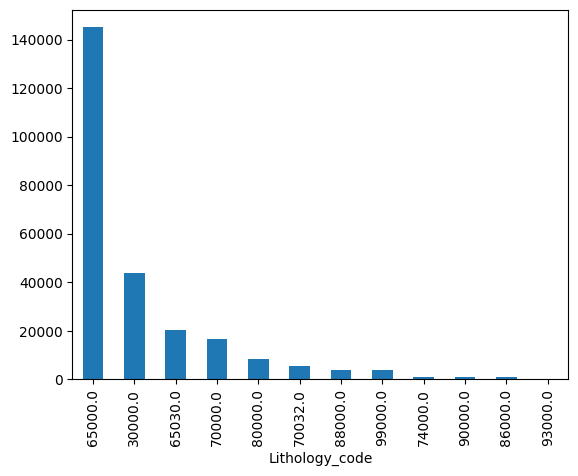

In [38]:
# LABEL DISTRIBUTION
dataset_df['Lithology_code'].value_counts().plot(kind='bar')

In [1]:
dataset_df.head()

NameError: name 'dataset_df' is not defined

In [ ]:
dataset_df['Lithology_code'].value_counts()

Lithology_code
65000.0    144966
30000.0     43855
65030.0     20284
70000.0     16767
80000.0      8245
70032.0      5343
88000.0      3919
99000.0      3824
74000.0      1109
90000.0      1027
86000.0       920
93000.0       141
Name: count, dtype: int64

In [68]:
# Calculate total and percentage of null values
total_null = dataset_df.isnull().sum()
percent_null = (dataset_df.isnull().sum() / len(dataset_df)) * 100

# Combine the results
null_stats = pd.DataFrame({
    'Total Null': total_null,
    'Percent Null': percent_null
})

# Format percentage to 2 decimal places
null_stats['Percent Null'] = null_stats['Percent Null'].round(2)

# Sort by percentage of nulls descending
null_stats = null_stats.sort_values('Percent Null', ascending=False)

print(null_stats)

                Total Null  Percent Null
DTS                 290768         95.56
SGR                 286863         94.28
ROPA                282201         92.74
RMIC                275741         90.62
RXO                 236168         77.62
DCAL                233798         76.84
RSHA                169270         55.63
NPHI                166872         54.84
BS                  164623         54.10
PEF                 154822         50.88
MUDWEIGHT           129899         42.69
RHOB                 93394         30.69
DRHO                 92338         30.35
SP                   88024         28.93
CALI                 62918         20.68
ROP                  59884         19.68
Lithology_code       53881         17.71
DTC                  39246         12.90
RMED                 26576          8.73
DEPTH_MD              7543          2.48
Y_LOC                 7543          2.48
X_LOC                 7543          2.48
Z_LOC                 7543          2.48
RDEP            

# **DATASET PREPARATION**

In [9]:
# 1. DTC CLEANING

# Fungsi untuk menghapus 'val:' dan '[UNIT]' serta konversi ke float
def clean_value(value):
    if isinstance(value, str):  # Pastikan nilai adalah string
        # Hapus 'val:' jika ada
        if 'val:' in value:
            value = value.replace('val:', '').strip()
        # Hapus '[UNIT]' jika ada
        if '[UNIT]' in value:
            value = value.replace('[UNIT]', '').strip()
        # Coba konversi ke float
        try:
            return float(value)
        except ValueError:
            return value  # Kembalikan asli jika gagal konversi
    # Jika bukan string (misalnya sudah float), kembalikan apa adanya
    try:
        return float(value)
    except (ValueError, TypeError):
        return value  # Kembalikan asli jika gagal konversi

# Terapkan fungsi ke kolom DTC
dataset_df['DTC'] = dataset_df['DTC'].apply(clean_value)

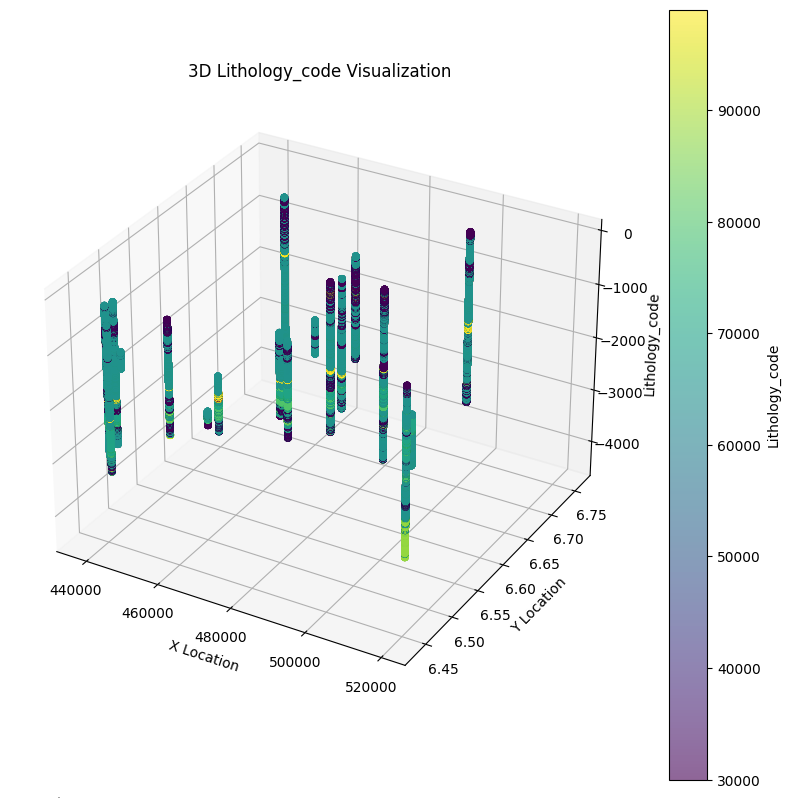

In [41]:
# DATA VISUALIZATION

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ambil data yang sudah diklaster
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot setiap klaster dengan warna berbeda
scatter = ax.scatter(
    dataset_df['X_LOC'], 
    dataset_df['Y_LOC'], 
    dataset_df['Z_LOC'], 
    c=dataset_df['Lithology_code'], 
    cmap='viridis', 
    marker='o', 
    alpha=0.6
)

# Label sumbu
ax.set_xlabel('X Location')
ax.set_ylabel('Y Location')
ax.set_zlabel('Lithology_code')
ax.set_title('3D Lithology_code Visualization')

# Tambahkan legend
plt.colorbar(scatter, ax=ax, label="Lithology_code")
plt.show()

In [58]:
# Get unique lithology codes
lithology_groups = {}
unique_lithology = dataset_df['Lithology_code'].dropna().unique()

# Create separate dataframes for each lithology code
for litho in unique_lithology:
    lithology_groups[litho] = dataset_df[dataset_df['Lithology_code'] == litho].copy()

# Print number of samples in each lithology group
for litho, df in lithology_groups.items():
    print(f"Lithology code {litho}: {len(df)} samples")

Lithology code 65000.0: 144966 samples
Lithology code 30000.0: 43855 samples
Lithology code 70000.0: 16767 samples
Lithology code 74000.0: 1109 samples
Lithology code 80000.0: 8245 samples
Lithology code 99000.0: 3824 samples
Lithology code 65030.0: 20284 samples
Lithology code 70032.0: 5343 samples
Lithology code 90000.0: 1027 samples
Lithology code 88000.0: 3919 samples
Lithology code 86000.0: 920 samples
Lithology code 93000.0: 141 samples


In [ ]:
import seaborn as sns

# Get the correlation matrix
selected_columns = ['Z_LOC', 'GR', 'RHOB', 'NPHI', 'DTC', 'RDEP', 'PEF', 'Lithology_code']
correlation_matrix = dataset_df[selected_columns].select_dtypes('number').corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix for Selected Well Log Parameters')
plt.tight_layout()
plt.show()

In [69]:
for i in list(lithology_groups.keys()):
    print(f"Class : {i}")
    display(lithology_groups[i].describe())
    # Calculate total and percentage of null values
    total_null = lithology_groups[i].isnull().sum()
    percent_null = (lithology_groups[i].isnull().sum() / len(lithology_groups[i])) * 100

    # Combine the results
    null_stats = pd.DataFrame({
        'Total Null': total_null,
        'Percent Null': percent_null
    })

    # Format percentage to 2 decimal places
    null_stats['Percent Null'] = null_stats['Percent Null'].round(2)

    # Sort by percentage of nulls descending
    null_stats = null_stats.sort_values('Percent Null', ascending=False)

    print(null_stats)

Class : 65000.0


,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
count,144966.0,7802.000000,65600.000000,84798.000000,47027.000000,42695.000000,16703.000000,113573.000000,114071.000000,142673.000000,...,118356.000000,77949.000000,12694.000000,144962.000000,139538.000000,75718.000000,144962.000000,144965.000000,144966.000000,144962.000000
mean,65000.0,23.576068,13.469340,5.097696,6.075223,0.959117,2.517800,34.590266,71.414328,1.724204,...,2.177241,0.412762,69.684758,468394.108940,14.233386,7.375672,-1803.457992,373.411417,1828.128712,9.540445
std,0.0,10.452330,3.058056,6.523259,82.195053,1.630537,27.003711,60.918886,56.249804,4.247977,...,0.239135,0.107723,20.837237,25996.713222,3.338640,84.915531,823.495396,913.670609,823.503094,6.024267
min,65000.0,1.066335,8.500000,0.393791,0.123182,-8.475032,0.198617,0.016824,-171.911362,0.224348,...,1.204448,-0.005300,-196.869995,437593.906250,5.946157,0.137852,-4362.296387,9.450689,193.905016,0.000000
25%,65000.0,15.488374,12.250001,2.879425,0.760274,0.189575,0.752027,6.348088,40.399937,0.813507,...,2.016964,0.326710,58.371679,442440.406250,12.344464,0.742715,-2268.481323,54.074108,1269.315698,3.000000
50%,65000.0,23.036595,12.250001,3.604046,1.118259,0.580055,1.106751,19.551739,58.818588,1.204964,...,2.113277,0.437836,68.234966,475874.125000,13.543076,1.020539,-1655.217407,76.989143,1679.687396,9.000000
75%,65000.0,30.451663,17.500000,4.770886,2.312148,1.445313,1.830913,35.269379,92.288960,1.694880,...,2.358756,0.495270,78.835135,487279.031250,17.518519,1.553637,-1244.590088,96.688530,2292.502000,16.000000
max,65000.0,85.177483,26.000002,275.688873,2000.000000,13.504553,3465.375244,702.564026,277.997406,1183.470703,...,3.266250,0.901139,152.516830,520153.187500,26.040655,1999.800049,-166.905014,5107.217703,4388.762001,20.000000


                Total Null  Percent Null
DTS                 142339         98.19
ROPA                137164         94.62
SGR                 132272         91.24
RMIC                128263         88.48
DCAL                102271         70.55
RXO                  97939         67.56
BS                   79366         54.75
RSHA                 69248         47.77
NPHI                 67017         46.23
PEF                  60168         41.50
MUDWEIGHT            51822         35.75
ROP                  31393         21.66
SP                   30895         21.31
RHOB                 26610         18.36
DRHO                 26151         18.04
DTC                   5735          3.96
CALI                  5428          3.74
RMED                  2293          1.58
file_name                0          0.00
Z_LOC                    4          0.00
RDEP                     1          0.00
DEPT                     0          0.00
Y_LOC                    4          0.00
X_LOC           

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
count,43855.0,3416.000000,24105.000000,28591.000000,9059.000000,12745.000000,2826.000000,34879.000000,34785.000000,41828.000000,...,35421.000000,18514.000000,2312.000000,43854.000000,41708.000000,18141.000000,43854.000000,43854.000000,43855.000000,43854.000000
mean,30000.0,21.017985,13.596393,4.129749,9.751289,0.986400,3.212625,37.316292,63.210485,2.381828,...,2.131151,0.263323,36.145116,469713.665948,15.251839,9.146555,-1581.065285,345.670347,1605.648616,10.047476
std,0.0,12.592101,3.854628,6.513703,197.856034,2.356889,12.574559,99.468518,58.343195,12.882005,...,0.294128,0.130750,11.253502,21283.909362,4.981932,94.142311,930.085325,919.245940,930.212412,5.395580
min,30000.0,0.864788,8.500000,0.351116,0.112000,-7.281250,0.206778,0.000000,-237.974487,0.064636,...,1.165622,0.003804,19.446173,437610.875000,6.268975,0.005141,-4258.212402,3.407264,139.734000,0.000000
25%,30000.0,13.359204,9.870000,2.275960,0.585765,-0.060562,0.297279,2.108702,32.020046,0.625299,...,2.010076,0.165417,29.046108,444186.437500,12.071549,0.580183,-2289.107299,27.870820,862.876000,6.000000
50%,30000.0,18.182114,12.250001,3.164830,1.425180,0.183679,0.531785,10.869685,47.546917,0.811764,...,2.107769,0.234933,32.719587,476768.187500,15.325307,0.835582,-1258.218079,39.161982,1283.311115,9.000000
75%,30000.0,27.150130,17.500000,4.678455,3.965785,1.145943,2.792874,32.017094,86.789314,1.562082,...,2.351118,0.348044,38.979737,483543.179688,18.662021,1.849924,-838.568130,63.068592,2314.979000,16.000000
max,30000.0,91.352913,26.000002,253.630905,9980.342773,11.203100,265.933899,2224.647461,269.670074,1400.614014,...,3.152632,0.765867,93.701401,520153.187500,27.344881,1999.800049,-114.733925,4723.373942,4284.642001,20.000000


                Total Null  Percent Null
SGR                  41543         94.73
RMIC                 41029         93.56
DTS                  41019         93.53
ROPA                 40439         92.21
RXO                  34796         79.34
DCAL                 31110         70.94
RSHA                 25714         58.63
NPHI                 25341         57.78
BS                   19750         45.03
MUDWEIGHT            15904         36.26
PEF                  15264         34.81
SP                    9070         20.68
ROP                   8976         20.47
RHOB                  8434         19.23
DRHO                  8189         18.67
DTC                   3948          9.00
CALI                  2147          4.90
RMED                  2027          4.62
file_name                0          0.00
Z_LOC                    1          0.00
RDEP                     1          0.00
DEPT                     0          0.00
Y_LOC                    1          0.00
X_LOC           

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
count,16767.0,3570.000000,10520.000000,13883.000000,3448.000000,6856.000000,993.000000,15429.000000,10366.000000,16714.000000,...,16227.000000,12360.000000,1481.000000,16767.000000,16504.000000,4206.000000,16767.000000,16767.000000,16767.000000,16767.000000
mean,70000.0,14.928088,11.186241,5.363352,66.662705,0.392890,16.679070,17.194805,95.851973,5.177289,...,2.462344,0.195021,20.239369,466450.250705,12.324246,22.983065,-2226.675072,333.447732,2251.553156,6.531699
std,0.0,7.850139,1.937226,2.472602,1231.472091,0.824259,230.985651,35.144473,38.986826,23.905720,...,0.155311,0.096622,13.895872,21869.125337,2.555272,146.299798,496.423330,917.941315,496.065205,4.888686
min,70000.0,0.573740,8.500000,1.106026,0.170654,-0.652152,0.264056,0.048639,-102.486374,0.282922,...,1.395604,0.003834,9.464324,437612.968750,7.902300,0.233659,-3445.323486,5.147152,501.298001,0.000000
25%,70000.0,9.774474,8.500000,4.511052,1.864214,0.054701,2.198487,4.479815,60.499541,1.751626,...,2.396490,0.138234,12.925288,444161.093750,12.198723,1.460557,-2593.217895,14.459533,1766.508597,3.000000
50%,70000.0,13.166251,12.250001,5.119856,4.353890,0.210620,2.767525,11.391405,103.871620,2.761894,...,2.490443,0.175272,15.242255,476768.218750,12.442139,3.362304,-2358.614502,27.678976,2383.799790,6.000000
75%,70000.0,17.542704,12.250001,5.714760,8.476997,0.496856,3.577162,19.818596,116.013777,5.726446,...,2.573612,0.230965,18.590279,480020.906250,12.846192,8.318478,-1740.828430,50.935169,2617.350999,9.000000
max,70000.0,47.721733,17.500000,79.189705,35930.671875,11.203100,5828.440918,997.353699,243.965652,1859.126221,...,2.906611,0.643048,97.394142,520153.187500,23.703100,1975.619019,-476.292602,4716.573346,3467.992000,20.000000


                Total Null  Percent Null
RMIC                 15774         94.08
SGR                  15286         91.17
RXO                  13319         79.44
ROPA                 13197         78.71
RSHA                 12561         74.92
DTS                  12210         72.82
DCAL                  9911         59.11
MUDWEIGHT             6724         40.10
SP                    6401         38.18
BS                    6247         37.26
NPHI                  4407         26.28
PEF                   2884         17.20
ROP                   1338          7.98
RHOB                   540          3.22
DRHO                   530          3.16
CALI                   263          1.57
DTC                     70          0.42
RMED                    53          0.32
file_name                0          0.00
Z_LOC                    0          0.00
RDEP                     0          0.00
DEPT                     0          0.00
Y_LOC                    0          0.00
X_LOC           

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
count,1109.0,94.000000,572.000000,478.000000,281.000000,320.000000,25.000000,833.000000,807.000000,1014.000000,...,915.000000,597.000000,18.000000,1109.000000,954.000000,564.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,74000.0,11.114026,11.903847,5.031994,27.379430,1.337457,4.272144,21.120777,76.885168,9.194586,...,2.438300,0.223479,41.401148,467002.989039,13.549069,223.130932,-2269.350023,357.603987,2294.869059,9.755636
std,0.0,5.120993,3.431073,4.635698,85.555066,2.115501,5.343618,33.190448,33.005931,65.622559,...,0.237189,0.106888,4.540981,25233.629624,3.851935,503.831596,507.859466,925.021084,508.231342,5.372478
min,74000.0,1.575173,8.500000,0.504132,0.145359,-0.148000,0.319141,1.073425,30.658678,0.468756,...,1.786440,0.005438,35.746407,437593.343750,8.219696,0.342028,-3246.156250,8.321856,1433.511197,0.000000
25%,74000.0,6.925152,8.500000,3.374765,0.954717,-0.023148,0.802598,4.406288,46.662792,0.980087,...,2.250209,0.141586,38.480398,444177.062500,8.766445,0.928890,-2691.822266,34.730915,1852.998000,7.000000
50%,74000.0,11.757221,12.250001,4.109847,3.131308,0.392567,1.590839,10.875896,68.280495,1.853602,...,2.472349,0.208205,40.254623,455221.343750,12.881832,3.017270,-2308.346191,43.164413,2333.669998,10.000000
75%,74000.0,14.176750,12.250001,4.733368,9.591885,1.353825,5.445319,23.028374,103.928741,3.551301,...,2.628142,0.297799,45.176111,479884.406250,17.532277,35.312071,-1830.905762,56.857128,2717.826001,13.000000
max,74000.0,24.134789,17.500000,40.759750,609.354675,8.528964,17.432646,237.191193,151.198853,1531.574219,...,2.984815,0.549118,50.658966,520153.187500,20.778965,1999.800049,-1408.253052,4035.112724,3272.024000,20.000000


                Total Null  Percent Null
SGR                   1091         98.38
DTS                   1085         97.84
RMIC                  1084         97.75
ROPA                  1015         91.52
RXO                    828         74.66
DCAL                   789         71.15
PEF                    631         56.90
RSHA                   545         49.14
BS                     537         48.42
NPHI                   512         46.17
MUDWEIGHT              380         34.27
SP                     302         27.23
ROP                    276         24.89
RHOB                   194         17.49
DRHO                   194         17.49
CALI                   155         13.98
RMED                    95          8.57
DTC                     82          7.39
file_name                0          0.00
Z_LOC                    0          0.00
RDEP                     0          0.00
DEPT                     0          0.00
Y_LOC                    0          0.00
X_LOC           

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
count,8245.0,2326.000000,4806.000000,5626.000000,546.000000,2304.000000,1060.000000,8245.000000,4609.000000,8179.000000,...,7931.000000,6561.000000,225.000000,8245.000000,8180.000000,2623.000000,8245.000000,8245.000000,8245.000000,8245.000000
mean,80000.0,13.887923,10.261648,4.937816,4.537749,0.562010,2.161646,28.431677,86.216129,2.115864,...,2.380337,0.312071,25.753947,477184.807542,11.820555,7.328343,-2060.970007,354.999523,2086.412766,7.787265
std,0.0,8.241929,1.873550,3.425609,4.718373,1.035585,1.068540,51.503892,55.061167,1.689693,...,0.143881,0.094012,11.472397,20224.483033,2.720867,82.685758,485.154346,909.238927,484.382035,4.518586
min,80000.0,1.127780,8.500000,0.720708,0.224547,-0.148000,0.132760,0.115105,22.897449,0.508042,...,1.679664,0.052824,13.624281,437613.250000,8.104930,0.224069,-2993.650391,8.054304,592.297016,0.000000
25%,80000.0,6.779065,8.500000,3.867643,1.162271,0.113175,1.614819,8.453481,38.192608,1.169969,...,2.299590,0.239861,18.031132,466873.500000,8.851600,0.775473,-2629.944092,39.527363,1806.268002,4.000000
50%,80000.0,13.164833,8.500000,4.413073,2.306227,0.313693,1.883666,16.053301,52.344803,1.666177,...,2.362937,0.326858,21.707199,477771.312500,12.471653,0.917233,-1873.534058,60.445324,1899.391197,6.000000
75%,80000.0,19.547558,12.250001,5.157318,6.236112,0.504303,2.462707,28.223747,119.156792,2.419014,...,2.488474,0.382328,28.304953,480020.625000,13.466190,1.222335,-1780.713623,80.113861,2654.184000,13.000000
max,80000.0,50.686687,12.500000,57.412315,19.742928,8.960192,7.445391,618.181824,221.381638,22.531811,...,3.135080,0.574594,68.367119,520153.187500,22.858215,1918.046020,-565.296997,4468.568356,3016.096000,18.000000


                Total Null  Percent Null
SGR                   8020         97.27
RXO                   7699         93.38
RMIC                  7185         87.14
DCAL                  5941         72.06
ROPA                  5919         71.79
DTS                   5629         68.27
RSHA                  5622         68.19
SP                    3636         44.10
MUDWEIGHT             3585         43.48
BS                    3439         41.71
PEF                   2619         31.76
NPHI                  1684         20.42
RHOB                   314          3.81
DRHO                   251          3.04
RMED                    66          0.80
CALI                    65          0.79
DTC                     30          0.36
Z_LOC                    0          0.00
RDEP                     0          0.00
DEPT                     0          0.00
file_name                0          0.00
Y_LOC                    0          0.00
X_LOC                    0          0.00
DEPTH_MD        

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
count,3824.0,248.000000,1052.000000,2433.000000,1625.000000,433.000000,326.000000,2667.000000,3406.000000,3824.000000,...,3233.000000,1802.000000,320.000000,3824.000000,3824.000000,2340.000000,3824.000000,3824.000000,3824.000000,3824.000000
mean,99000.0,19.017375,12.523527,6.178703,1.499658,0.508320,21.309893,16.363092,67.993982,0.945524,...,2.149670,0.441678,47.537205,471858.402082,14.887315,1.224806,-1873.336852,331.409700,1897.661515,11.319038
std,0.0,8.267392,0.748916,6.597591,0.924717,0.593190,363.698372,21.286975,26.464860,0.409637,...,0.103652,0.050890,11.057919,20443.705035,2.281892,0.880332,253.772827,899.258294,253.130387,5.849825
min,99000.0,5.591238,12.250001,1.940252,0.340981,-0.093800,0.810443,0.923100,36.354107,0.365883,...,1.654790,0.246399,28.036499,437621.781250,12.000000,0.340825,-2254.069580,13.917559,1397.844002,1.000000
25%,99000.0,11.162570,12.250001,3.766988,0.827969,0.144679,1.031672,3.827933,43.359843,0.638357,...,2.084392,0.409922,38.529462,466865.187500,12.522122,0.608633,-2147.630127,32.079576,1674.849197,6.000000
50%,99000.0,18.682758,12.250001,4.698184,1.279317,0.232843,1.101071,8.658588,61.877851,0.842571,...,2.139670,0.443405,45.979530,475881.468750,14.392668,0.908755,-1899.681824,44.209444,1921.778000,15.000000
75%,99000.0,27.126290,12.250001,6.384618,1.907157,0.915863,1.256947,19.290924,80.802742,1.115101,...,2.224999,0.471628,56.769833,487280.312500,17.138615,1.603569,-1649.537598,57.325855,2171.646000,16.000000
max,99000.0,35.787968,14.750000,136.382278,17.934008,2.556363,6567.910156,131.419907,148.849136,3.215387,...,2.535211,0.659060,80.550095,497350.843750,23.312500,18.177063,-1372.818115,4631.581614,2276.213998,18.000000


                Total Null  Percent Null
DTS                   3824        100.00
ROPA                  3576         93.51
SGR                   3504         91.63
RMIC                  3498         91.47
DCAL                  3391         88.68
BS                    2772         72.49
RXO                   2199         57.51
NPHI                  2022         52.88
MUDWEIGHT             1575         41.19
RSHA                  1484         38.81
PEF                   1391         36.38
ROP                   1157         30.26
RHOB                   591         15.46
DRHO                   591         15.46
SP                     418         10.93
DTC                    295          7.71
file_name                0          0.00
Z_LOC                    0          0.00
RDEP                     0          0.00
CALI                     0          0.00
DEPT                     0          0.00
Y_LOC                    0          0.00
X_LOC                    0          0.00
DEPTH_MD        

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
count,20284.0,605.000000,8835.000000,10143.000000,4981.000000,2926.000000,988.000000,14497.000000,13085.000000,16298.000000,...,14070.000000,7657.000000,301.000000,19565.000000,16174.000000,8280.000000,19565.000000,19916.000000,20284.000000,19565.000000
mean,65030.0,22.772732,14.238331,7.431591,5.532699,-0.077688,5.990254,52.005194,69.568157,2.714918,...,2.214513,0.289939,58.767181,478954.144956,14.402305,9.849878,-1594.246180,341.277873,1581.574775,12.728393
std,0.0,16.514358,4.142472,15.140377,83.470140,2.636337,5.450416,94.746259,53.174504,3.845638,...,0.293442,0.123828,13.622831,23776.347220,4.311419,88.679937,1077.365119,892.485507,1079.759190,5.005827
min,65030.0,0.472762,8.500000,0.844022,0.100000,-7.069767,0.234773,0.042114,-54.996132,0.076104,...,1.183385,0.000673,30.804266,437596.250000,7.008980,0.100000,-4347.557617,14.120954,80.150000,1.000000
25%,65030.0,12.024194,9.870000,2.821553,1.146934,-0.023400,1.297770,4.437228,37.699100,1.032448,...,1.979130,0.199420,49.215340,466874.062500,9.656200,0.968843,-2308.494873,44.323569,820.980001,9.000000
50%,65030.0,17.195702,17.500000,3.553994,1.403446,0.203239,6.477505,20.447123,55.387306,1.419329,...,2.163835,0.265275,56.815269,483542.156250,14.534122,1.270976,-1186.781616,58.295488,1186.402000,13.000000
75%,65030.0,29.832346,17.500000,5.141199,5.264482,0.969000,9.057786,51.454651,80.076355,2.346417,...,2.480353,0.372776,68.071312,497355.468750,17.693336,2.150363,-813.118835,72.260067,2301.310000,17.000000
max,65030.0,87.712921,25.999998,318.368317,5375.279785,12.986826,82.836594,697.435852,259.972168,159.210571,...,2.859491,0.733934,97.943428,520153.187500,25.236811,1776.184204,-111.085991,4532.374724,4374.018001,20.000000


                Total Null  Percent Null
SGR                  19983         98.52
ROPA                 19679         97.02
DTS                  19676         97.00
RMIC                 19296         95.13
DCAL                 17358         85.57
RXO                  15303         75.44
NPHI                 12627         62.25
RSHA                 12004         59.18
BS                   11449         56.44
MUDWEIGHT            11420         56.30
PEF                  10141         50.00
SP                    7199         35.49
RHOB                  6214         30.63
DRHO                  6124         30.19
ROP                   5787         28.53
DTC                   4972         24.51
CALI                  4110         20.26
RMED                  3986         19.65
Z_LOC                  719          3.54
X_LOC                  719          3.54
Y_LOC                  719          3.54
Cluster_DBSCAN         719          3.54
DEPTH_MD               719          3.54
GR              

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
count,5343.0,0.0,984.000000,984.000000,0.0,984.000000,0.0,5300.000000,4487.000000,4497.000000,...,5343.000000,3159.000000,0.0,5343.000000,5343.000000,2171.000000,5343.000000,5343.000000,5343.000000,5343.000000
mean,70032.0,NaN,11.791530,5.093220,NaN,-0.016472,NaN,52.230966,48.339330,2.339055,...,2.325162,0.207081,NaN,500673.664310,15.462923,1.551893,-1495.203614,342.697225,1521.751024,10.631293
std,0.0,NaN,1.526766,0.442236,NaN,0.563182,NaN,70.150620,31.895549,1.485648,...,0.167446,0.078280,NaN,30332.494692,2.693907,1.134144,496.843777,926.989166,496.146328,4.244089
min,70032.0,NaN,8.500000,3.708045,NaN,-0.352959,NaN,0.686766,25.305315,0.095034,...,1.493566,0.037590,NaN,444160.531250,8.527619,0.206800,-2656.418701,5.782680,1020.177016,2.000000
25%,70032.0,NaN,12.500000,4.809281,NaN,-0.187500,NaN,6.584942,29.546846,1.466063,...,2.243010,0.157096,NaN,466870.968750,12.813325,0.711300,-1750.380860,20.182695,1205.387904,11.000000
50%,70032.0,NaN,12.500000,5.130098,NaN,-0.099269,NaN,34.869528,31.391125,1.877108,...,2.322982,0.207551,NaN,515574.437500,16.393806,1.141360,-1282.582764,26.099556,1309.582793,13.000000
75%,70032.0,NaN,12.500000,5.394069,NaN,0.015975,NaN,63.445400,42.953897,2.616401,...,2.428796,0.259249,NaN,520153.187500,17.528573,2.012681,-1178.387878,30.773164,1775.739197,13.000000
max,70032.0,NaN,12.500000,6.312599,NaN,3.976600,NaN,595.939148,116.414833,8.904622,...,2.796767,0.412652,NaN,520153.187500,21.064295,7.940060,-993.177002,4722.600897,2681.871790,15.000000


                Total Null  Percent Null
SGR                   5343        100.00
ROPA                  5343        100.00
RXO                   5343        100.00
RMIC                  5343        100.00
DTS                   5343        100.00
BS                    4359         81.58
PEF                   4359         81.58
DCAL                  4359         81.58
RSHA                  3172         59.37
NPHI                  2184         40.88
MUDWEIGHT             1350         25.27
SP                     856         16.02
RMED                   846         15.83
DTC                    822         15.38
ROP                     43          0.80
RDEP                     0          0.00
Z_LOC                    0          0.00
DEPT                     0          0.00
X_LOC                    0          0.00
CALI                     0          0.00
file_name                0          0.00
Y_LOC                    0          0.00
RHOB                     0          0.00
DEPTH_MD        

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
count,1027.0,0.0,410.000000,965.000000,265.000000,186.000000,120.000000,692.000000,733.000000,1025.000000,...,1027.000000,584.000000,0.0,1027.000000,1027.000000,445.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,90000.0,NaN,13.351220,4.815395,8.753660,1.952901,11.560620,7.692768,78.644294,10.927172,...,1.766197,0.417471,NaN,469490.684488,15.229128,5.533666,-2250.896262,338.315894,2275.818958,12.106134
std,0.0,NaN,4.491754,2.779556,12.957712,2.916721,13.535808,11.675815,82.653556,60.925755,...,0.377710,0.113424,NaN,18797.025295,7.233453,11.019086,1316.513219,915.979050,1316.777120,4.084325
min,90000.0,NaN,8.500000,0.896676,0.219411,-0.320233,0.251984,0.013768,12.518961,0.353522,...,1.232469,0.123612,NaN,442438.406250,8.132800,0.220700,-3891.416016,11.061003,548.874001,2.000000
25%,90000.0,NaN,8.500000,2.788254,0.652653,0.242188,1.846770,1.432700,19.350092,0.551235,...,1.450560,0.339646,NaN,442444.625000,8.633462,0.532330,-3571.790894,21.570368,805.212000,9.000000
50%,90000.0,NaN,17.500000,4.177090,2.382657,0.430379,7.650752,2.673987,38.362003,4.166173,...,1.663241,0.431132,NaN,475845.625000,9.867675,0.622075,-3003.166016,38.920017,3025.526000,12.000000
75%,90000.0,NaN,17.500000,6.045811,12.834182,2.194373,16.439364,7.289261,127.327164,10.766714,...,2.050451,0.506989,NaN,479888.375000,22.812500,5.173123,-780.195770,77.797119,3597.982001,17.000000
max,90000.0,NaN,17.500000,12.639180,79.311729,7.355035,81.430534,62.385437,280.640411,1796.209106,...,2.756330,0.676855,NaN,497358.531250,24.863583,96.096764,-523.867737,4622.387562,3914.112000,19.000000


                Total Null  Percent Null
SGR                   1027        100.00
ROPA                  1027        100.00
DTS                   1027        100.00
RMIC                   907         88.32
DCAL                   841         81.89
RXO                    762         74.20
BS                     617         60.08
RSHA                   582         56.67
NPHI                   443         43.14
ROP                    335         32.62
MUDWEIGHT              332         32.33
SP                     294         28.63
PEF                     62          6.04
DTC                     20          1.95
RMED                     2          0.19
Z_LOC                    0          0.00
RDEP                     0          0.00
DEPT                     0          0.00
CALI                     0          0.00
X_LOC                    0          0.00
file_name                0          0.00
Y_LOC                    0          0.00
RHOB                     0          0.00
DEPTH_MD        

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
count,3919.0,0.0,20.0,20.000000,0.0,20.000000,0.0,3913.000000,20.000000,20.000000,...,3919.000000,3919.000000,0.0,3919.000000,3919.000000,1675.000000,3919.000000,3919.000000,3919.000000,3919.000000
mean,88000.0,NaN,8.5,15.958059,NaN,2.634469,NaN,45.411379,127.010042,13.034341,...,2.075396,0.047551,NaN,519765.504154,12.461948,553.611143,-2868.883602,321.593910,2895.881996,12.943863
std,0.0,NaN,0.0,3.271177,NaN,0.919877,NaN,13.749694,3.259785,12.260363,...,0.051358,0.029216,NaN,5413.699933,0.399295,459.593974,192.255973,924.440026,192.254387,0.783907
min,88000.0,NaN,8.5,11.991861,NaN,0.171869,NaN,2.296446,121.072884,2.915897,...,1.609768,0.008412,NaN,444186.500000,8.671869,0.647886,-3211.465332,1.273675,2530.601016,2.000000
25%,88000.0,NaN,8.5,12.987748,NaN,2.140540,NaN,37.872314,124.920534,6.391620,...,2.059908,0.038199,NaN,520153.187500,12.238116,139.876236,-3030.053223,10.213770,2751.989016,13.000000
50%,88000.0,NaN,8.5,15.141126,NaN,2.586434,NaN,45.132313,129.081810,8.294719,...,2.070817,0.040993,NaN,520153.187500,12.362041,467.385742,-2879.953369,11.290671,2906.953016,13.000000
75%,88000.0,NaN,8.5,18.584188,NaN,3.365189,NaN,49.786095,129.432201,11.818092,...,2.083512,0.044383,NaN,520153.187500,12.570756,861.289032,-2724.989258,14.573349,3057.053016,13.000000
max,88000.0,NaN,8.5,21.353271,NaN,4.162254,NaN,148.222260,130.416336,45.182999,...,2.847889,0.369930,NaN,520153.187500,15.849291,1986.174805,-2503.601074,4209.397952,3238.465016,13.000000


                Total Null  Percent Null
SGR                   3919        100.00
RMIC                  3919        100.00
ROPA                  3919        100.00
DTS                   3919        100.00
RXO                   3919        100.00
RMED                  3899         99.49
SP                    3899         99.49
DCAL                  3899         99.49
PEF                   3899         99.49
BS                    3899         99.49
RSHA                  2244         57.26
ROP                      6          0.15
NPHI                     0          0.00
DEPT                     0          0.00
RDEP                     0          0.00
Z_LOC                    0          0.00
CALI                     0          0.00
X_LOC                    0          0.00
file_name                0          0.00
Y_LOC                    0          0.00
RHOB                     0          0.00
DEPTH_MD                 0          0.00
DRHO                     0          0.00
Lithology_code  

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
count,920.0,122.000000,680.000000,197.000000,483.000000,605.000000,0.0,920.000000,500.000000,429.000000,...,920.000000,920.000000,0.0,920.000000,920.000000,606.000000,920.000000,920.000000,920.000000,920.000000
mean,86000.0,9.759490,11.163604,5.750384,359.117110,0.660365,NaN,22.623466,96.230707,386.441462,...,2.820424,0.021896,NaN,472917.256658,11.915339,1066.545489,-2459.632419,307.200787,2485.650236,8.003261
std,0.0,3.469064,1.702349,0.675774,357.363807,0.485757,NaN,10.650368,17.910576,541.118390,...,0.199318,0.054677,NaN,29144.935534,1.903691,809.464059,249.052229,887.388024,249.341696,2.981807
min,86000.0,4.314073,8.500000,3.682804,0.743811,-0.027717,NaN,1.967044,76.629646,2.361164,...,2.031215,-0.015035,NaN,437593.750000,8.271731,0.314998,-3239.936279,8.555569,2087.990396,3.000000
25%,86000.0,7.969524,8.500000,5.253819,91.309872,0.406000,NaN,12.748437,82.482552,48.439590,...,2.743774,-0.007222,NaN,449958.812500,12.183204,185.825367,-2563.029175,13.590046,2434.675604,7.000000
50%,86000.0,8.774604,12.250001,5.938222,291.999481,0.454601,NaN,23.763395,89.925797,93.517754,...,2.913019,0.005062,NaN,449960.156250,12.656000,1087.620422,-2489.996948,19.887987,2516.997016,7.000000
75%,86000.0,10.705400,12.250001,6.249385,495.423462,0.953000,NaN,30.296906,106.821108,495.626617,...,2.946786,0.029335,NaN,480022.125000,13.193530,1989.541534,-2408.963440,28.663880,2589.031604,7.000000
max,86000.0,19.549557,12.250001,7.525509,1989.840698,2.239719,NaN,50.833294,149.681915,1841.164062,...,3.001404,0.353375,NaN,520153.187500,16.463476,1999.800049,-2061.624756,3986.527853,3265.792000,13.000000


                Total Null  Percent Null
RMIC                   920        100.00
SGR                    920        100.00
ROPA                   798         86.74
PEF                    723         78.59
DTS                    723         78.59
RMED                   491         53.37
RXO                    437         47.50
SP                     420         45.65
DCAL                   315         34.24
RSHA                   314         34.13
BS                     240         26.09
MUDWEIGHT              197         21.41
DTC                     17          1.85
CALI                     0          0.00
file_name                0          0.00
Z_LOC                    0          0.00
RDEP                     0          0.00
DEPT                     0          0.00
X_LOC                    0          0.00
Y_LOC                    0          0.00
NPHI                     0          0.00
RHOB                     0          0.00
DEPTH_MD                 0          0.00
DRHO            

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
count,141.0,0.0,9.500000e+01,0.0,0.0,141.000000,0.0,141.000000,141.000000,138.000000,...,94.000000,141.000000,0.0,141.000000,95.000000,0.0,141.000000,103.000000,141.000000,141.0
mean,93000.0,NaN,1.225000e+01,NaN,NaN,3257.818318,NaN,47.503323,99.152321,14.461946,...,2.894152,0.125129,NaN,449956.327349,12.558046,NaN,-2870.273140,227.452779,2896.337604,7.0
std,0.0,NaN,1.785781e-15,NaN,NaN,4699.086998,NaN,8.308941,5.508258,46.453551,...,0.066192,0.060393,NaN,0.125589,0.172643,NaN,6.204082,739.821461,6.208786,0.0
min,93000.0,NaN,1.225000e+01,NaN,NaN,0.088741,NaN,34.518799,82.265785,4.132351,...,2.727421,0.043177,NaN,449956.187500,12.338740,NaN,-2880.904785,22.749788,2885.697604,7.0
25%,93000.0,NaN,1.225000e+01,NaN,NaN,0.195000,NaN,41.344532,96.375000,6.275903,...,2.862177,0.052610,NaN,449956.218750,12.445000,NaN,-2875.588379,29.806703,2891.017604,7.0
50%,93000.0,NaN,1.225000e+01,NaN,NaN,0.405391,NaN,45.481041,99.451416,8.133519,...,2.901811,0.136450,NaN,449956.281250,12.453841,NaN,-2870.275635,35.464161,2896.337604,7.0
75%,93000.0,NaN,1.225000e+01,NaN,NaN,10011.387695,NaN,54.393303,103.094002,9.482239,...,2.929342,0.161909,NaN,449956.437500,12.656012,NaN,-2864.957520,62.203884,2901.657604,7.0
max,93000.0,NaN,1.225000e+01,NaN,NaN,10012.417969,NaN,64.853600,108.175911,455.464966,...,3.054074,0.243862,NaN,449956.562500,13.062956,NaN,-2859.638184,3607.536963,2906.977604,7.0


                Total Null  Percent Null
ROPA                   141        100.00
PEF                    141        100.00
RXO                    141        100.00
DTS                    141        100.00
RMIC                   141        100.00
SGR                    141        100.00
RSHA                   141        100.00
DTC                     48         34.04
RHOB                    47         33.33
BS                      46         32.62
CALI                    46         32.62
RDEP                    38         26.95
GR                      38         26.95
RMED                     3          2.13
X_LOC                    0          0.00
file_name                0          0.00
NPHI                     0          0.00
DEPT                     0          0.00
Z_LOC                    0          0.00
Y_LOC                    0          0.00
DEPTH_MD                 0          0.00
DRHO                     0          0.00
Lithology_code           0          0.00
MUDWEIGHT       

# **DATASET EACH CLASS**

In [62]:
for i in list(lithology_groups.keys()):
    print(f"Class : {i}")
    display(lithology_groups[i])

Class : 65000.0


,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
7442,16_1-2_part_2,65000.0,NaN,8.500000,NaN,NaN,NaN,NaN,56.905998,100.044289,...,NaN,NaN,NaN,455221.34375,8.023255,1.683155,-2620.580078,73.558113,2645.580001,0.0
7443,16_1-2_part_2,65000.0,NaN,8.500000,NaN,NaN,NaN,NaN,56.792545,100.293167,...,NaN,NaN,NaN,455221.34375,8.024439,1.743812,-2620.731934,73.467598,2645.732002,0.0
7444,16_1-2_part_2,65000.0,NaN,8.500000,NaN,NaN,NaN,NaN,55.627075,100.508331,...,NaN,NaN,NaN,455221.34375,8.025548,1.765278,-2620.884033,72.116478,2645.884002,0.0
7445,16_1-2_part_2,65000.0,NaN,8.500000,NaN,NaN,NaN,NaN,55.470150,100.170883,...,NaN,NaN,NaN,455221.34375,8.026745,1.672552,-2621.035889,69.835365,2646.036002,0.0
7446,16_1-2_part_2,65000.0,NaN,8.500000,NaN,NaN,NaN,NaN,56.290169,99.813011,...,NaN,NaN,NaN,455221.34375,8.027942,1.478103,-2621.187988,67.834320,2646.188002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304133,25_9-1_part_1,65000.0,NaN,12.250001,NaN,0.909105,NaN,0.865607,103.293953,112.877350,...,NaN,NaN,NaN,483538.34375,12.302708,0.905595,-1258.580566,84.661751,1283.686000,18.0
304134,25_9-1_part_1,65000.0,NaN,12.250001,NaN,0.898053,NaN,0.983548,62.135990,113.918968,...,NaN,NaN,NaN,483538.34375,12.303081,0.898813,-1258.732544,84.840385,1283.838000,18.0
304135,25_9-1_part_1,65000.0,NaN,12.250001,NaN,0.884976,NaN,1.128230,61.386215,115.045578,...,NaN,NaN,NaN,483538.34375,12.303099,0.891655,-1258.884399,84.943695,1283.990000,18.0
304136,25_9-1_part_1,65000.0,NaN,12.250001,NaN,0.864062,NaN,1.067114,61.327152,116.347244,...,NaN,NaN,NaN,483538.34375,12.303099,0.877380,-1259.036377,84.957664,1284.142000,18.0


Class : 30000.0


,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
7882,16_1-2_part_2,30000.0,NaN,8.500000,NaN,NaN,NaN,NaN,41.083054,115.249199,...,2.257217,0.218318,NaN,455221.34375,14.666450,7.535691,-2687.459961,58.311520,2712.460002,0.0
7975,16_1-2_part_2,30000.0,NaN,8.500000,NaN,NaN,NaN,NaN,61.275585,107.675835,...,2.548615,0.085455,NaN,455221.34375,12.509160,11.159978,-2701.595947,88.030212,2726.596002,0.0
7976,16_1-2_part_2,30000.0,NaN,8.500000,NaN,NaN,NaN,NaN,56.616833,106.604393,...,2.518298,0.114017,NaN,455221.34375,12.547709,7.984135,-2701.748047,86.302811,2726.748002,0.0
7977,16_1-2_part_2,30000.0,NaN,8.500000,NaN,NaN,NaN,NaN,54.551075,105.224342,...,2.492360,0.147875,NaN,455221.34375,12.620093,6.876383,-2701.899902,79.648369,2726.900002,0.0
7978,16_1-2_part_2,30000.0,NaN,8.500000,NaN,NaN,NaN,NaN,56.219810,103.775002,...,2.470284,0.180865,NaN,455221.34375,12.537360,7.797420,-2702.052002,67.485962,2727.052002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304276,25_9-1_part_1,30000.0,NaN,12.250001,NaN,0.444816,NaN,0.319061,99.948418,138.276688,...,NaN,NaN,NaN,483538.03125,12.278873,0.447957,-1280.314209,64.063187,1305.422000,18.0
304277,25_9-1_part_1,30000.0,NaN,12.250001,NaN,0.446592,NaN,0.322394,99.947151,137.679504,...,NaN,NaN,NaN,483538.03125,12.277086,0.449823,-1280.466187,63.323219,1305.574000,18.0
304278,25_9-1_part_1,30000.0,NaN,12.250001,NaN,0.445796,NaN,0.326236,99.914108,137.264862,...,NaN,NaN,NaN,483538.03125,12.276823,0.448358,-1280.618042,2901.263932,1305.726000,18.0
304279,25_9-1_part_1,30000.0,NaN,12.250001,NaN,0.442556,NaN,0.330221,98.451340,137.055588,...,NaN,NaN,NaN,483538.03125,12.277803,0.443910,-1280.770142,63.589741,1305.878000,18.0


Class : 70000.0


,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
7883,16_1-2_part_2,70000.0,NaN,8.500000,NaN,NaN,NaN,NaN,41.090725,114.676979,...,2.348940,0.140577,NaN,455221.34375,14.755183,11.546832,-2687.612061,54.654480,2712.612002,0.0
7884,16_1-2_part_2,70000.0,NaN,8.500000,NaN,NaN,NaN,NaN,41.098473,113.969925,...,2.387241,0.081933,NaN,455221.34375,14.938627,14.400445,-2687.763916,50.975998,2712.764002,0.0
7885,16_1-2_part_2,70000.0,NaN,8.500000,NaN,NaN,NaN,NaN,44.188194,113.338409,...,2.379428,0.046625,NaN,455221.34375,15.137249,18.191942,-2687.916016,47.293182,2712.916002,0.0
7886,16_1-2_part_2,70000.0,NaN,8.500000,NaN,NaN,NaN,NaN,66.177452,112.810905,...,2.350613,0.032215,NaN,455221.34375,15.291835,22.902903,-2688.068115,45.387657,2713.068002,0.0
7887,16_1-2_part_2,70000.0,NaN,8.500000,NaN,NaN,NaN,NaN,88.766441,111.931580,...,2.341339,0.027379,NaN,455221.34375,15.171341,20.613649,-2688.219971,2764.224739,2713.220001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302768,25_9-1_part_1,70000.0,NaN,12.250001,NaN,1.904682,NaN,0.797375,26.377127,34.620167,...,NaN,NaN,NaN,483541.43750,12.429523,2.042463,-1051.127808,72.042397,1076.206000,18.0
302769,25_9-1_part_1,70000.0,NaN,12.250001,NaN,1.880442,NaN,1.111056,26.378195,34.643600,...,NaN,NaN,NaN,483541.43750,12.402932,1.997885,-1051.279785,76.016640,1076.358000,18.0
302770,25_9-1_part_1,70000.0,NaN,12.250001,NaN,1.781532,NaN,1.106881,26.676880,34.708817,...,NaN,NaN,NaN,483541.43750,12.361438,1.808622,-1051.431763,83.636871,1076.510000,18.0
302771,25_9-1_part_1,70000.0,NaN,12.250001,NaN,1.642835,NaN,1.104138,26.707972,34.866322,...,NaN,NaN,NaN,483541.43750,12.348182,1.597228,-1051.583740,89.332138,1076.662000,18.0


Class : 74000.0


,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
8088,16_1-2_part_2,74000.0,NaN,8.500000,NaN,NaN,NaN,NaN,171.415253,66.209991,...,2.568563,0.271008,NaN,455221.34375,8.228330,7.141089,-2718.771973,55.553375,2743.772001,0.0
8089,16_1-2_part_2,74000.0,NaN,8.500000,NaN,NaN,NaN,NaN,188.898361,66.062637,...,2.551190,0.268727,NaN,455221.34375,8.228543,7.285794,-2718.924072,48.814137,2743.924002,0.0
8090,16_1-2_part_2,74000.0,NaN,8.500000,NaN,NaN,NaN,NaN,195.344650,66.006210,...,2.529454,0.265620,NaN,455221.34375,8.225271,7.347950,-2719.075928,46.208858,2744.076002,0.0
8091,16_1-2_part_2,74000.0,NaN,8.500000,NaN,NaN,NaN,NaN,193.500183,65.919853,...,2.514565,0.263476,NaN,455221.34375,8.219696,7.301731,-2719.228027,46.671314,2744.228002,0.0
8092,16_1-2_part_2,74000.0,NaN,8.500000,NaN,NaN,NaN,NaN,190.550186,65.837280,...,2.513845,0.263322,NaN,455221.34375,8.221699,7.203130,-2719.379883,47.636086,2744.380002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295925,25_8-7_part_1,74000.0,NaN,12.250001,NaN,NaN,1.246811,0.358666,27.100046,NaN,...,NaN,NaN,NaN,475895.84375,13.496813,0.662825,-1610.343140,78.537483,1635.343115,20.0
295926,25_8-7_part_1,74000.0,NaN,12.250001,NaN,NaN,1.201395,0.802598,27.154915,NaN,...,NaN,NaN,NaN,475895.84375,13.451397,0.700902,-1610.495117,77.691071,1635.495115,20.0
295927,25_8-7_part_1,74000.0,NaN,12.250001,NaN,NaN,1.159504,1.656585,27.209789,NaN,...,NaN,NaN,NaN,475895.84375,13.409507,0.726771,-1610.647095,77.175041,1635.647115,20.0
295928,25_8-7_part_1,74000.0,NaN,12.250001,NaN,NaN,1.237509,1.151683,27.264668,NaN,...,NaN,NaN,NaN,475895.84375,13.487513,0.720614,-1610.799072,2908.598728,1635.799115,20.0


Class : 80000.0


,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
8236,16_1-2_part_2,80000.0,NaN,8.5,NaN,NaN,NaN,NaN,119.665237,100.112221,...,2.741846,0.159920,NaN,455221.34375,8.681064,7.936426,-2741.268066,57.034363,2766.268002,0.0
8237,16_1-2_part_2,80000.0,NaN,8.5,NaN,NaN,NaN,NaN,119.250656,99.200645,...,2.743078,0.162151,NaN,455221.34375,8.671599,9.661157,-2741.419922,64.830872,2766.420002,0.0
8238,16_1-2_part_2,80000.0,NaN,8.5,NaN,NaN,NaN,NaN,116.286949,98.025017,...,2.748913,0.156432,NaN,455221.34375,8.662137,11.490611,-2741.572021,72.150772,2766.572002,0.0
8239,16_1-2_part_2,80000.0,NaN,8.5,NaN,NaN,NaN,NaN,109.156921,96.584320,...,2.736469,0.154921,NaN,455221.34375,8.653524,13.117897,-2741.724121,72.950043,2766.724002,0.0
8240,16_1-2_part_2,80000.0,NaN,8.5,NaN,NaN,NaN,NaN,98.404381,95.123917,...,2.717386,0.158152,NaN,455221.34375,8.657104,14.200735,-2741.875977,68.743988,2766.876002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288690,25_9-1_part_2,80000.0,NaN,8.5,4.080371,1.952159,NaN,2.249301,12.525102,NaN,...,2.548155,0.189953,NaN,483526.21875,8.908367,1.886879,-2067.532959,57.655800,2092.782000,18.0
288691,25_9-1_part_2,80000.0,NaN,8.5,3.889572,2.015246,NaN,2.111395,9.858435,NaN,...,2.518517,0.197238,NaN,483526.21875,8.908516,1.962707,-2067.685059,61.310558,2092.934000,18.0
288692,25_9-1_part_2,80000.0,NaN,8.5,3.815194,2.137141,NaN,2.190456,8.131295,NaN,...,2.496125,0.210169,NaN,483526.21875,8.907408,2.092287,-2067.836914,64.447006,2093.086000,18.0
288693,25_9-1_part_2,80000.0,NaN,8.5,3.854392,2.284376,NaN,2.665015,8.358334,NaN,...,2.491712,0.215853,NaN,483526.21875,8.906782,2.277185,-2067.989014,66.278763,2093.238000,18.0


Class : 99000.0


,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
13172,15_9-17_part_2,99000.0,NaN,NaN,5.300392,0.815193,NaN,NaN,8.130041,42.076752,...,2.234822,0.471062,57.089931,438597.18750,12.785290,0.813914,-2183.704102,46.358994,2205.837998,1.0
13173,15_9-17_part_2,99000.0,NaN,NaN,5.538922,0.853502,NaN,NaN,8.126268,43.222500,...,2.287944,0.478726,56.467628,438597.18750,12.857622,0.852202,-2183.856201,43.021465,2205.989998,1.0
13174,15_9-17_part_2,99000.0,NaN,NaN,5.263198,0.852347,NaN,NaN,8.639630,43.206963,...,2.331146,0.445788,58.580250,438597.18750,13.117069,0.852848,-2184.008301,41.365047,2206.141998,1.0
13175,15_9-17_part_2,99000.0,NaN,NaN,4.865234,1.198736,NaN,NaN,8.635854,42.236221,...,2.323719,0.422665,61.853535,438597.18750,13.408519,1.185659,-2184.160156,43.551666,2206.293998,1.0
13176,15_9-17_part_2,99000.0,NaN,NaN,4.462306,1.419427,NaN,NaN,8.632127,42.834629,...,2.261489,0.425719,65.365265,438597.18750,12.974773,1.416954,-2184.312256,48.534340,2206.445998,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287343,25_9-1_part_2,99000.0,NaN,12.250001,NaN,1.050500,NaN,1.018460,69.392525,121.434700,...,NaN,NaN,NaN,483529.21875,12.326462,1.050090,-1862.839355,72.280457,1888.038000,18.0
287344,25_9-1_part_2,99000.0,NaN,12.250001,NaN,1.076125,NaN,1.146847,16.522972,120.904388,...,NaN,NaN,NaN,483529.18750,12.324228,1.092365,-1862.991211,73.754410,1888.190000,18.0
287345,25_9-1_part_2,99000.0,NaN,12.250001,NaN,1.094201,NaN,1.360280,13.022278,120.554985,...,NaN,NaN,NaN,483529.18750,12.322386,1.113438,-1863.143311,72.543556,1888.342000,18.0
287346,25_9-1_part_2,99000.0,NaN,12.250001,NaN,1.098760,NaN,1.803519,13.029342,120.547180,...,NaN,NaN,NaN,483529.18750,12.323902,1.112442,-1863.295166,69.965805,1888.494000,18.0


Class : 65030.0


,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
14605,15_9-17_part_2,65030.0,NaN,NaN,3.037829,1.423093,NaN,NaN,12.206104,31.580051,...,2.199507,0.269388,32.400856,438597.15625,12.352001,1.421635,-2401.485596,30.231665,2423.653998,1.0
14606,15_9-17_part_2,65030.0,NaN,NaN,3.207185,1.460887,NaN,NaN,12.205424,31.287048,...,2.193871,0.271878,33.497665,438597.15625,12.352001,1.459890,-2401.637451,31.787123,2423.805998,1.0
14607,15_9-17_part_2,65030.0,NaN,NaN,3.095026,1.336216,NaN,NaN,12.204315,31.602354,...,2.195142,0.272000,34.720924,438597.15625,12.352001,1.339342,-2401.789551,36.202885,2423.957998,1.0
14608,15_9-17_part_2,65030.0,NaN,NaN,3.018733,1.298023,NaN,NaN,12.203334,34.031841,...,2.195300,0.273920,36.673042,438597.15625,12.358399,1.298658,-2401.941650,36.908062,2424.109998,1.0
14609,15_9-17_part_2,65030.0,NaN,NaN,3.333093,1.406274,NaN,NaN,12.272263,34.941734,...,2.200673,0.297959,38.853569,438597.15625,12.415975,1.403537,-2402.093506,39.498653,2424.261998,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303840,25_9-1_part_1,65030.0,NaN,12.250001,NaN,1.278596,NaN,1.264090,72.637947,108.231110,...,NaN,NaN,NaN,483538.90625,12.393400,1.273686,-1214.048706,71.546341,1239.150000,18.0
303841,25_9-1_part_1,65030.0,NaN,12.250001,NaN,1.260591,NaN,1.408859,72.658783,107.960915,...,NaN,NaN,NaN,483538.90625,12.393400,1.256558,-1214.200684,72.576630,1239.302000,18.0
303842,25_9-1_part_1,65030.0,NaN,12.250001,NaN,1.245527,NaN,1.379623,73.048500,107.614761,...,NaN,NaN,NaN,483538.90625,12.393052,1.243457,-1214.352661,74.389664,1239.454000,18.0
304099,25_9-1_part_1,65030.0,NaN,12.250001,NaN,1.009769,NaN,1.494371,75.479218,111.399841,...,NaN,NaN,NaN,483538.43750,12.342592,0.957282,-1253.413208,77.802635,1278.518000,18.0


Class : 70032.0


,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
23557,16_10-1_part_2,70032.0,NaN,12.5,5.026339,NaN,-0.093800,NaN,11.962803,103.178528,...,2.410537,0.192881,NaN,444160.53125,12.406200,NaN,-2266.073730,25.419407,2291.231790,2.0
23558,16_10-1_part_2,70032.0,NaN,12.5,4.920403,NaN,-0.094200,NaN,10.977394,102.938385,...,2.460481,0.179281,NaN,444160.53125,12.405800,NaN,-2266.225830,26.612770,2291.383790,2.0
23559,16_10-1_part_2,70032.0,NaN,12.5,4.689782,NaN,-0.156331,NaN,9.513380,102.438194,...,2.457576,0.176204,NaN,444160.53125,12.343670,NaN,-2266.377686,30.737442,2291.535790,2.0
23560,16_10-1_part_2,70032.0,NaN,12.5,4.273468,NaN,-0.187500,NaN,9.588197,101.741066,...,2.475694,0.153196,NaN,444160.53125,12.312500,NaN,-2266.529541,33.069889,2291.687790,2.0
23561,16_10-1_part_2,70032.0,NaN,12.5,4.328025,NaN,-0.187500,NaN,9.238579,101.566940,...,2.472706,0.151304,NaN,444160.56250,12.312500,NaN,-2266.681641,32.960213,2291.839790,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230520,16_8-1_part_2,70032.0,NaN,NaN,NaN,NaN,NaN,NaN,19.417807,45.487907,...,2.474300,0.189340,NaN,466871.09375,13.287960,2.967516,-1803.178589,26.698023,1828.559197,15.0
230521,16_8-1_part_2,70032.0,NaN,NaN,NaN,NaN,NaN,NaN,19.401489,45.187267,...,2.475540,0.189865,NaN,466871.09375,13.292556,3.010903,-1803.330566,26.025255,1828.711197,15.0
230522,16_8-1_part_2,70032.0,NaN,NaN,NaN,NaN,NaN,NaN,19.385065,45.039803,...,2.476814,0.191229,NaN,466871.09375,13.297235,3.045366,-1803.482544,26.970833,1828.863197,15.0
230523,16_8-1_part_2,70032.0,NaN,NaN,NaN,NaN,NaN,NaN,19.368660,45.025536,...,2.455564,0.189572,NaN,466871.09375,13.301789,3.028965,-1803.634521,29.013771,1829.015197,15.0


Class : 90000.0


,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
28478,16_10-1_part_2,90000.0,NaN,8.5,1.867661,NaN,-0.262853,NaN,6.322294,113.243088,...,1.638481,0.535638,NaN,444183.37500,8.237147,NaN,-3012.723877,46.075203,3039.22379,2.0
28479,16_10-1_part_2,90000.0,NaN,8.5,1.898283,NaN,-0.306876,NaN,4.990744,113.727547,...,1.612758,0.566084,NaN,444183.37500,8.193124,NaN,-3012.875488,42.153706,3039.37579,2.0
28480,16_10-1_part_2,90000.0,NaN,8.5,1.870393,NaN,-0.254718,NaN,3.490628,114.044357,...,1.581844,0.581979,NaN,444183.37500,8.245281,NaN,-3013.027100,38.920017,3039.52779,2.0
28481,16_10-1_part_2,90000.0,NaN,8.5,1.815864,NaN,-0.305355,NaN,3.489866,114.146317,...,1.566962,0.578331,NaN,444183.37500,8.194645,NaN,-3013.178467,37.344067,3039.67979,2.0
28482,16_10-1_part_2,90000.0,NaN,8.5,1.989873,NaN,-0.312500,NaN,3.595518,114.484421,...,1.537922,0.548355,NaN,444183.37500,8.187500,NaN,-3013.330322,37.457901,3039.83179,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290476,25_9-1_part_2,90000.0,NaN,8.5,6.039072,1.958367,NaN,0.568257,41.787441,NaN,...,2.173380,0.595628,NaN,483525.34375,9.318080,1.976958,-2338.976318,114.799126,2364.25400,19.0
290625,25_9-1_part_2,90000.0,NaN,8.5,4.750373,1.600092,NaN,1.514881,62.385437,NaN,...,2.191153,0.605222,NaN,483525.15625,8.681265,1.416711,-2361.623535,88.091393,2386.90200,19.0
290626,25_9-1_part_2,90000.0,NaN,8.5,5.010783,1.879405,NaN,1.575678,57.211376,NaN,...,2.067665,0.636431,NaN,483525.15625,8.683511,1.710998,-2361.775391,89.420006,2387.05400,19.0
290627,25_9-1_part_2,90000.0,NaN,8.5,5.380030,2.281618,NaN,1.333369,56.286098,NaN,...,2.044433,0.636836,NaN,483525.15625,8.700654,2.202675,-2361.927490,94.687172,2387.20600,19.0


Class : 88000.0


,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
28982,16_10-1_part_2,88000.0,NaN,8.5,11.991861,NaN,0.171869,NaN,2.300950,130.416336,...,2.283624,0.081382,NaN,444186.50000,8.671869,NaN,-3089.108398,62.269581,3115.831790,2.0
28983,16_10-1_part_2,88000.0,NaN,8.5,13.069986,NaN,1.468779,NaN,2.299350,130.414154,...,2.075924,0.022034,NaN,444186.50000,9.968780,NaN,-3089.260010,59.533211,3115.983790,2.0
28984,16_10-1_part_2,88000.0,NaN,8.5,12.741033,NaN,1.973323,NaN,2.297947,130.204529,...,2.024817,0.008412,NaN,444186.50000,10.473323,NaN,-3089.411621,57.331295,3116.135790,2.0
28985,16_10-1_part_2,88000.0,NaN,8.5,12.594163,NaN,2.051360,NaN,2.296446,129.894394,...,2.040999,0.014834,NaN,444186.53125,10.551360,NaN,-3089.563232,48.451012,3116.287790,2.0
28986,16_10-1_part_2,88000.0,NaN,8.5,12.512554,NaN,2.104084,NaN,2.343070,129.526764,...,2.062437,0.021309,NaN,444186.53125,10.604083,NaN,-3089.714844,33.540520,3116.439790,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198083,17_11-1_part_2,88000.0,NaN,NaN,NaN,NaN,NaN,NaN,49.953651,NaN,...,1.997159,0.126441,NaN,520153.18750,12.248030,525.196472,-3210.857178,1.773538,3237.857016,13.0
198084,17_11-1_part_2,88000.0,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,...,2.012719,0.112439,NaN,520153.18750,12.252416,208.707199,-3211.009277,1.408370,3238.009016,13.0
198085,17_11-1_part_2,88000.0,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,...,2.018507,0.104481,NaN,520153.18750,12.256806,89.526634,-3211.161377,1.341022,3238.161016,13.0
198086,17_11-1_part_2,88000.0,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,...,2.005253,0.107911,NaN,520153.18750,12.262195,21.578579,-3211.313232,1.273675,3238.313016,13.0


Class : 86000.0


,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
49946,15_9-13_part_2,86000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.006311,149.367996,...,2.639835,0.268823,NaN,437593.90625,8.543819,NaN,-3237.509277,75.024231,3263.360000,3.0
49947,15_9-13_part_2,86000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.061740,149.644363,...,2.639080,0.245953,NaN,437593.87500,8.565626,NaN,-3237.660889,56.482269,3263.512000,3.0
49948,15_9-13_part_2,86000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.117209,148.830750,...,2.654254,0.172478,NaN,437593.87500,8.557857,NaN,-3237.812500,38.253300,3263.664000,3.0
49949,15_9-13_part_2,86000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.165531,148.378281,...,2.684608,0.091190,NaN,437593.87500,8.511191,NaN,-3237.964355,22.439653,3263.816000,3.0
49950,15_9-13_part_2,86000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.186501,148.395004,...,2.771984,0.040198,NaN,437593.84375,8.475175,NaN,-3238.115967,19.318420,3263.968000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215734,16_4-1_part_2,86000.0,NaN,12.250001,NaN,140.191589,0.625000,NaN,22.163824,91.029449,...,2.903664,0.005785,NaN,449959.78125,12.875000,1931.809082,-2577.912109,20.455711,2603.737604,7.0
215735,16_4-1_part_2,86000.0,NaN,12.250001,NaN,203.596390,0.625000,NaN,22.154861,91.272926,...,2.874635,0.014656,NaN,449959.78125,12.875000,1988.278076,-2578.063965,3937.836814,2603.889604,7.0
215736,16_4-1_part_2,86000.0,NaN,12.250001,NaN,163.805389,0.625000,NaN,17.947498,92.264442,...,2.827918,0.029156,NaN,449959.78125,12.875000,1999.683350,-2578.215576,38.651436,2604.041604,7.0
215737,16_4-1_part_2,86000.0,NaN,12.250001,NaN,16.254295,0.611180,NaN,16.070168,92.275002,...,2.788696,0.048017,NaN,449959.78125,12.861179,1988.372437,-2578.367676,59.759026,2604.193604,7.0


Class : 93000.0


,file_name,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,...,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT,Cluster_DBSCAN
217589,16_4-1_part_2,93000.0,NaN,12.250001,NaN,NaN,0.198743,NaN,35.564899,106.185844,...,2.906910,0.225975,NaN,449956.21875,12.448743,NaN,-2859.638184,36.882721,2885.697604,7.0
217590,16_4-1_part_2,93000.0,NaN,12.250001,NaN,NaN,0.196747,NaN,35.564899,106.481544,...,2.924920,0.207394,NaN,449956.21875,12.446747,NaN,-2859.790283,33.419064,2885.849604,7.0
217591,16_4-1_part_2,93000.0,NaN,12.250001,NaN,NaN,0.195000,NaN,35.436512,107.249863,...,2.928863,0.188093,NaN,449956.21875,12.445000,NaN,-2859.942139,33.868916,2886.001604,7.0
217592,16_4-1_part_2,93000.0,NaN,12.250001,NaN,NaN,0.195000,NaN,34.518799,108.005653,...,2.920740,0.173378,NaN,449956.21875,12.445000,NaN,-2860.093994,33.521832,2886.153604,7.0
217593,16_4-1_part_2,93000.0,NaN,12.250001,NaN,NaN,0.195000,NaN,34.518799,107.063744,...,2.900475,0.165052,NaN,449956.21875,12.445000,NaN,-2860.246094,34.630878,2886.305604,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217725,16_4-1_part_2,93000.0,NaN,NaN,NaN,NaN,10011.413086,NaN,50.732201,87.240463,...,NaN,0.049948,NaN,449956.53125,NaN,NaN,-2880.296875,NaN,2906.369604,7.0
217726,16_4-1_part_2,93000.0,NaN,NaN,NaN,NaN,10011.443359,NaN,50.813881,85.998558,...,NaN,0.049892,NaN,449956.53125,NaN,NaN,-2880.448730,NaN,2906.521604,7.0
217727,16_4-1_part_2,93000.0,NaN,NaN,NaN,NaN,10011.450195,NaN,51.157806,86.587990,...,NaN,0.049849,NaN,449956.53125,NaN,NaN,-2880.600830,NaN,2906.673604,7.0
217728,16_4-1_part_2,93000.0,NaN,NaN,NaN,NaN,10011.442383,NaN,51.196465,84.972305,...,NaN,0.049825,NaN,449956.56250,NaN,NaN,-2880.752930,NaN,2906.825604,7.0


# **FEATURE ENGINEERING**

### **CLUSTERING BY X AND Y CORDINATE**

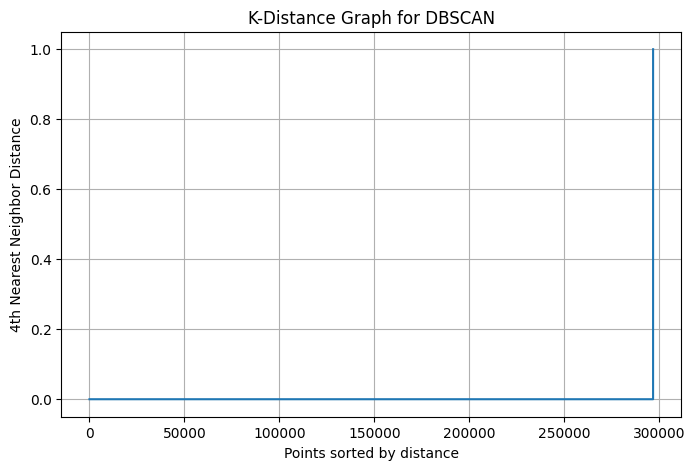

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Ambil data X dan Y

valid_indices = dataset_df[['X_LOC', 'Y_LOC']].dropna().index

# Get X array for clustering
X = dataset_df.loc[valid_indices, ['X_LOC', 'Y_LOC']].astype(int).values

# Cari epsilon menggunakan k-dist plot
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Urutkan dan plot jarak ke tetangga terdekat
distances = np.sort(distances[:, 4])  # Jarak ke tetangga ke-4
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.grid()
plt.show()

In [10]:
from sklearn.cluster import DBSCAN

# Get indices of non-null X_LOC and Y_LOC values
valid_indices = dataset_df[['X_LOC', 'Y_LOC']].dropna().index

# Get X array for clustering
X = dataset_df.loc[valid_indices, ['X_LOC', 'Y_LOC']].astype(int).values

# Gunakan eps berdasarkan k-dist plot (misal 0.06)
dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Tambahkan hasil klaster ke dataset
dataset_df.loc[valid_indices, 'Cluster_DBSCAN'] = clusters

# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6)
plt.xlabel('X_LOC')
plt.ylabel('Y_LOC')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

NameError: name 'plt' is not defined

In [45]:
dataset_df['Cluster_DBSCAN'].value_counts()

Cluster_DBSCAN
17.0    28050
9.0     24672
16.0    21285
3.0     20956
13.0    20293
1.0     19706
2.0     19471
7.0     17775
6.0     15507
4.0     13621
18.0    13047
12.0    13029
8.0     10885
11.0    10757
10.0    10259
0.0      9274
14.0     7541
15.0     7285
5.0      6535
20.0     4093
19.0     2697
Name: count, dtype: int64

# **SPLIT BY CLUSTER**

In [46]:
import pandas as pd

# Misalkan hasil clustering DBSCAN ada di dataset_df['Cluster_DBSCAN']
clusters = dataset_df['Cluster_DBSCAN'].dropna().unique()  # Ambil semua cluster unik

# Buat dictionary untuk menyimpan DataFrame tiap cluster
cluster_dfs = {}

for cluster in clusters:
    cluster_dfs[cluster] = dataset_df[dataset_df['Cluster_DBSCAN'] == cluster].copy()
    
print(list(cluster_dfs.keys()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]


## **EXPLANATORY DATA ANALYSIS**

Fitur-fitur seperti **GR, NPHI, RHOB, DTC, dan RDEP** adalah kunci utama untuk mengenali jenis batuan karena mencerminkan sifat fisik seperti radioaktivitas, porositas, kepadatan, kecepatan gelombang suara, dan resistivitas listrik. Fitur tambahan seperti lokasi (X_LOC, Y_LOC, Z_LOC) dan kedalaman (DEPTH_MD, DEPT) memberikan konteks geologis, sementara fitur seperti MUDWEIGHT dan CALI lebih relevan untuk kondisi pengeboran. Dengan memahami pola-pola ini, identifikasi jenis batuan berdasarkan data log sumur menjadi lebih akurat.

In [47]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Pilih fitur yang akan dibandingkan
# features = ['GR', 'NPHI', 'RHOB', 'DTC', 'RDEP']

# # Pilih palet warna yang kontras
# color_palette = "rainbow"  # Bisa ganti ke "Set1", "rainbow", atau "hsv"

# for i in list(cluster_dfs.keys()):
#     # Buat pairplot
#     plt.figure(figsize=(12, 8))
#     sns.pairplot(cluster_dfs[19.0], vars=features, hue="Lithology_code", palette=color_palette, plot_kws={'alpha': 0.7, 's': 30})

#     plt.suptitle(f"Cluster {i}", y=1.02, fontsize=16)
#     plt.show()

In [12]:
dataset_df.to_csv("clustered_dataset.csv",index=False)